In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import sklearn
from sklearn.linear_model import LinearRegression,LassoCV,RidgeCV,ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures #数据预处理，标准化
from sklearn.pipeline import Pipeline
from sklearn.linear_model.coordinate_descent import ConvergenceWarning

In [3]:
## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False
## 拦截异常
warnings.filterwarnings(action = 'ignore', category=ConvergenceWarning)

In [4]:
np.linspace(0,6,10)

array([0.        , 0.66666667, 1.33333333, 2.        , 2.66666667,
       3.33333333, 4.        , 4.66666667, 5.33333333, 6.        ])

In [7]:
#创建模拟数据
np.random.seed(100)
np.set_printoptions(linewidth=1000,suppress=True) 
N=10
x=np.linspace(0,6,N)+np.random.randn(N)
y=1.8*x**3+x**2-14*x-7+np.random.randn(N)
x.shape=(-1,1)
y.shape=(-1,1)




In [8]:
models=[
    Pipeline([
        ('Poly',PolynomialFeatures(include_bias=True)),
        ('Linear',LinearRegression(fit_intercept=False))
    ]),
    Pipeline([
        ('Poly',PolynomialFeatures(include_bias=True)),
        ('Linear',RidgeCV(alphas=np.logspace(-3,2,50),fit_intercept=False))
    ]),
    Pipeline([
        ('Poly',PolynomialFeatures(include_bias=True)),
        ('Linear',LassoCV(alphas=np.logspace(0,1,10),fit_intercept=False))
    ]),
    Pipeline([
        ('Poly',PolynomialFeatures(include_bias=True)),
        ('Linear',ElasticNetCV(alphas=np.logspace(0,1,10),l1_ratio=[.1,.5,.7,.9,.95,1],fit_intercept=False))
    ]),
]

1阶，系数为: [-44.14102611  40.05964256]
5阶，系数为: [ -5.60899679 -14.80109301   0.75014858   2.11170671  -0.07724668   0.00566633]
9阶，系数为: [-2465.58381316  6108.63817712 -5111.99333504   974.74974891  1078.89649478  -829.50277842   266.13230658   -45.71741587     4.1158274     -0.15281063]


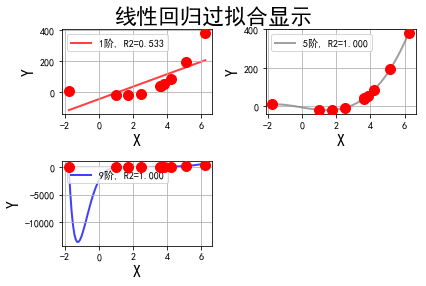

In [13]:
#线性模型过拟合图形识别
plt.figure(facecolor='w')
degree=np.arange(1,N,4)
dm=degree.size
colors=[]
for c in np.linspace(16711680,255,dm):
    colors.append('#%06x'%int(c))

model=models[0]
for i,d in enumerate(degree):
    plt.subplot(int(np.ceil(dm/2.0)),2,i+1)
    plt.plot(x,y,'ro',ms=10,zorder=N)

    #设置阶数
    model.set_params(Poly__degree=d)
    model.fit(x,y.ravel())

    lin=model.get_params()['Linear']
    output=u'%d阶，系数为:'%(d)
    print(output,lin.coef_.ravel())

    x_hat=np.linspace(x.min(),x.max(),num=100)
    x_hat.shape=(-1,1)
    y_hat=model.predict(x_hat)
    s=model.score(x,y)
    
    z=N-1 if (d==5) else 0
    label = u'%d阶, R2=%.3f' % (d,s)
    plt.plot(x_hat, y_hat, color=colors[i], lw=2, alpha=0.75, label=label, zorder=z)
    
    plt.legend(loc = 'upper left')
    plt.grid(True)
    plt.xlabel('X', fontsize=16)
    plt.ylabel('Y', fontsize=16)
    
plt.tight_layout(1, rect=(0,0,1,0.95))
plt.suptitle(u'线性回归过拟合显示', fontsize=22)
plt.show()

